In [1]:
import pandas as pd

df = pd.read_csv('FINAL_DATASET.csv')

df

/var/folders/xn/v6_q4n654js318dcjhl41qrc0000gn/T/ipykernel_73938/3090410393.py:3: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FINAL_DATASET.csv')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015,3,8,3,1,2015-08-03,WN,19393,WN,N7743B,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
1,2015,3,8,3,1,2015-08-03,WN,19393,WN,N525SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
2,2015,3,8,3,1,2015-08-03,WN,19393,WN,N528SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
3,2015,3,8,3,1,2015-08-03,WN,19393,WN,N523SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
4,2015,3,8,3,1,2015-08-03,WN,19393,WN,N515SW,...,27.4,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502068,2025,3,7,30,3,2025-07-30,WN,19393,WN,N8737L,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502069,2025,3,7,30,3,2025-07-30,WN,19393,WN,N567WN,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502070,2025,3,7,30,3,2025-07-30,WN,19393,WN,N966WN,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN
4502071,2025,3,7,30,3,2025-07-30,WN,19393,WN,N8611F,...,29.8,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN


In [2]:
for col in df.columns:
    print(col)

Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime
Div1LongestGTime
Div1W

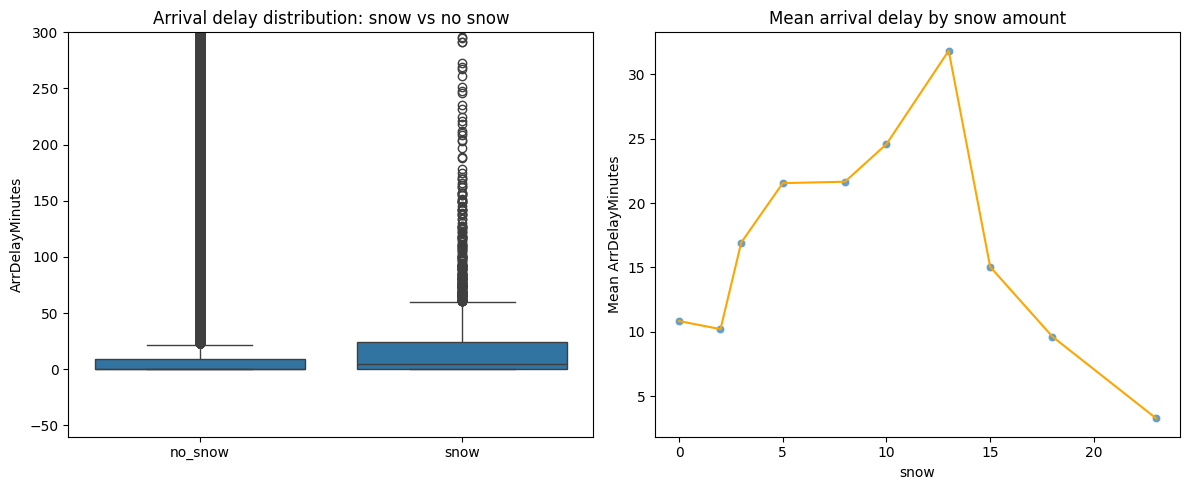

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# prepare data (convert snow to numeric in case it's object)
df['snow'] = pd.to_numeric(df['snow'], errors='coerce')

# Keep rows with snow info and arrival delay
arr = df[['snow', 'ArrDelayMinutes', 'DepDelayMinutes']].dropna(subset=['snow']).copy()
arr['snow_bin'] = (arr['snow'] > 0).map({False: 'no_snow', True: 'snow'})

plt.figure(figsize=(12,5))

# Boxplot: arrival delay distribution with/without snow
plt.subplot(1,2,1)
sns.boxplot(x='snow_bin', y='ArrDelayMinutes', data=arr)
plt.ylim(-60, 300)
plt.title('Arrival delay distribution: snow vs no snow')
plt.xlabel('')
plt.ylabel('ArrDelayMinutes')

# Mean arrival delay by snow amount (trim extreme snow values)
group = arr.dropna(subset=['ArrDelayMinutes']).groupby('snow', as_index=False)['ArrDelayMinutes'].mean()
group = group[group['snow'] <= group['snow'].quantile(0.99)]  # remove extreme 1% snow values

plt.subplot(1,2,2)
sns.scatterplot(x='snow', y='ArrDelayMinutes', data=group, alpha=0.7)
sns.lineplot(x='snow', y='ArrDelayMinutes', data=group, color='orange')
plt.title('Mean arrival delay by snow amount')
plt.xlabel('snow')
plt.ylabel('Mean ArrDelayMinutes')

plt.tight_layout()
plt.show()

sharp drop lowk due to cancellation

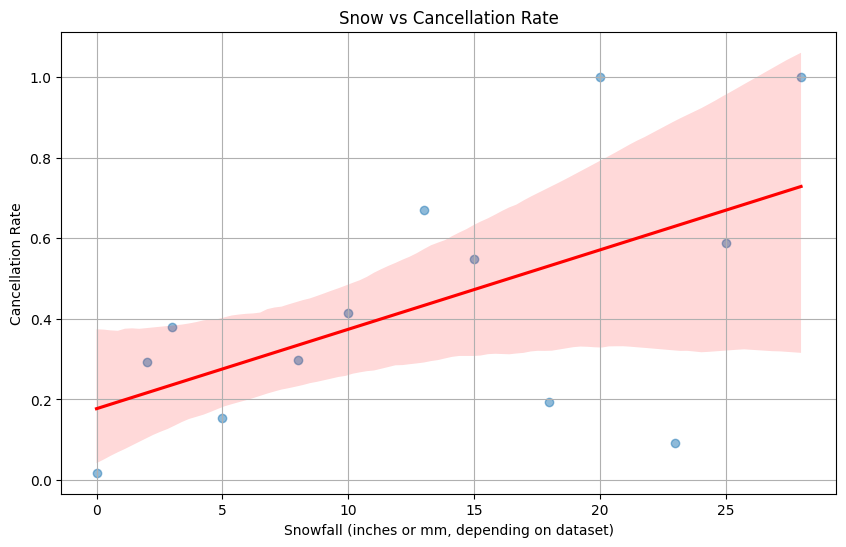

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Ensure numeric snow data
df['snow'] = pd.to_numeric(df['snow'], errors='coerce')

# Group by snow amount and compute average cancellation rate
snow_cancellations = (
    df.groupby('snow')['Cancelled']
    .mean()
    .reset_index()
    .sort_values('snow')
)

# Plot 1: Scatter + trendline
plt.figure(figsize=(10, 6))
sns.regplot(
    data=snow_cancellations,
    x='snow', y='Cancelled',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
)
plt.title('Snow vs Cancellation Rate')
plt.xlabel('Snowfall (inches or mm, depending on dataset)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()



/var/folders/xn/v6_q4n654js318dcjhl41qrc0000gn/T/ipykernel_73938/198195317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[delay_col] = df[delay_col].astype(float)


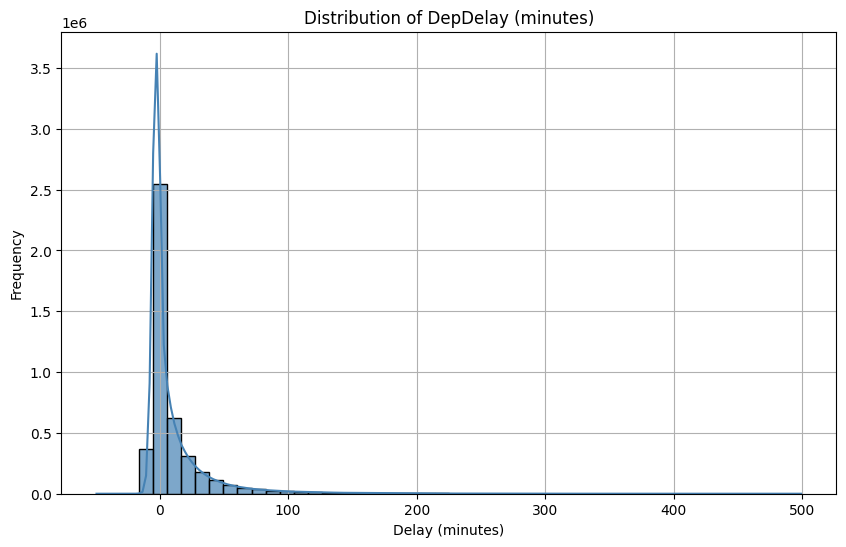

count    4.416489e+06
mean     1.018345e+01
std      2.827882e+01
min     -4.900000e+01
25%     -3.000000e+00
50%      0.000000e+00
75%      1.200000e+01
max      4.990000e+02
Name: DepDelay, dtype: float64


In [5]:
delay_col = "DepDelay"  # or "ArrDelay"

# Clean data: remove nulls/extreme outliers
df = df[pd.to_numeric(df[delay_col], errors='coerce').notna()]
df[delay_col] = df[delay_col].astype(float)
df = df[df[delay_col].between(-50, 500)]  # reasonable cutoff to avoid skew

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[delay_col], bins=50, kde=True, color='steelblue', alpha=0.7)
plt.title(f"Distribution of {delay_col} (minutes)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Optional: Print quick stats
print(df[delay_col].describe())

so max delay time was 500, place cancellation value 1440  to simulate length of day

In [ ]:
# Ensure DepDelay is numeric
df['DepDelay'] = pd.to_numeric(df['DepDelay'], errors='coerce')

# Create new column delayAndCancelled
df['delayAndCancelled'] = df.apply(
    lambda row: 1440 if row['Cancelled'] == 1 else row['DepDelay'], axis=1
)

# Verify result
print(df[['Cancelled', 'DepDelay', 'delayAndCancelled']].head())

   Cancelled  DepDelay  delayAndCancelled
0        0.0       2.0                2.0
1        0.0      -4.0               -4.0
2        0.0     -12.0              -12.0
3        0.0      -7.0               -7.0
4        0.0      -7.0               -7.0
5        0.0      -5.0               -5.0
6        0.0      -5.0               -5.0
7        0.0      -5.0               -5.0
8        0.0     116.0              116.0
9        0.0      -2.0               -2.0


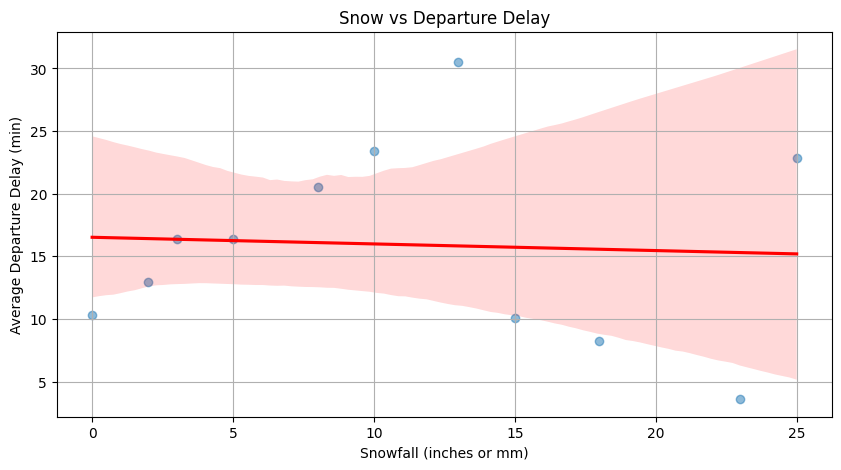

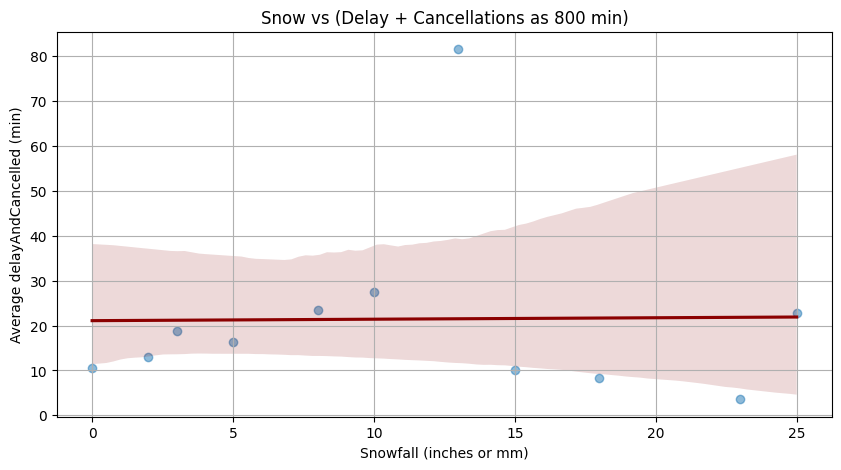

In [7]:
# Group by snow and compute mean delay for both metrics
delay_stats = (
    df.groupby('snow')[['DepDelay', 'delayAndCancelled']]
    .mean()
    .reset_index()
    .sort_values('snow')
)

# Plot 1: Snow vs Departure Delay
plt.figure(figsize=(10, 5))
sns.regplot(
    data=delay_stats, x='snow', y='DepDelay',
    scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}
)
plt.title("Snow vs Departure Delay")
plt.xlabel("Snowfall (inches or mm)")
plt.ylabel("Average Departure Delay (min)")
plt.grid(True)
plt.show()

# Plot 2: Snow vs delayAndCancelled
plt.figure(figsize=(10, 5))
sns.regplot(
    data=delay_stats, x='snow', y='delayAndCancelled',
    scatter_kws={'alpha': 0.5}, line_kws={'color': 'darkred'}
)
plt.title("Snow vs (Delay + Cancellations as 800 min)")
plt.xlabel("Snowfall (inches or mm)")
plt.ylabel("Average delayAndCancelled (min)")
plt.grid(True)
plt.show()

/var/folders/xn/v6_q4n654js318dcjhl41qrc0000gn/T/ipykernel_73938/3428238306.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('snow_bin')[['DepDelay', 'delayAndCancelled']].mean().reset_index()


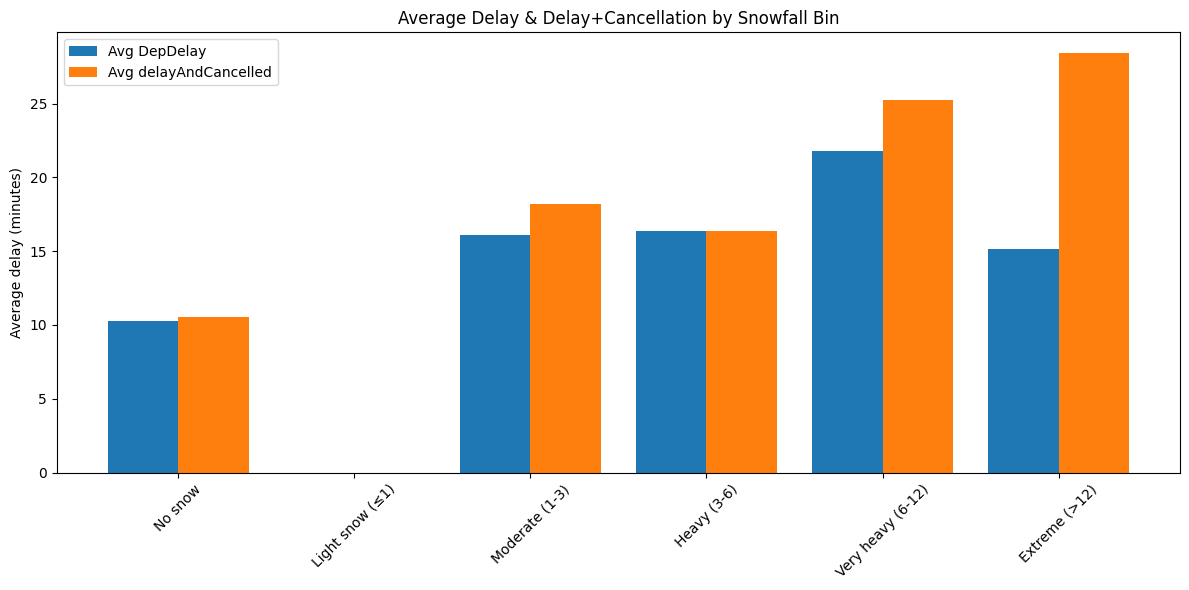

In [8]:
# Define custom snow bins (adjust thresholds as you see fit)
bins = [-0.1, 0, 1, 3, 6, 12, df['snow'].max()+1]
labels = [
    'No snow',          # 0
    'Light snow (≤1)',  # >0 to 1
    'Moderate (1-3)',   # >1 to 3
    'Heavy (3-6)',      # >3 to 6
    'Very heavy (6-12)',# >6 to 12
    'Extreme (>12)'     # >12
]
df['snow_bin'] = pd.cut(df['snow'], bins=bins, labels=labels)

# Compute grouped means
grouped = df.groupby('snow_bin')[['DepDelay', 'delayAndCancelled']].mean().reset_index()

# Plot: bar chart side by side
plt.figure(figsize=(12,6))
width = 0.4
x = range(len(grouped))

plt.bar(x, grouped['DepDelay'], width=width, label='Avg DepDelay')
plt.bar([i+width for i in x], grouped['delayAndCancelled'], width=width, label='Avg delayAndCancelled')
plt.xticks([i+width/2 for i in x], grouped['snow_bin'], rotation=45)
plt.ylabel('Average delay (minutes)')
plt.title('Average Delay & Delay+Cancellation by Snowfall Bin')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt

def load_and_preprocess_data(filepath='FINAL_DATASET.csv'):
    """
    Loads the dataset, selects features/target, handles missing values,
    scales features, and splits into training/testing sets.
    """
    print(f"Loading data from {filepath}...")
    # Suppress DtypeWarning, similar to your notebook
    warnings.filterwarnings('ignore', category=DtypeWarning)
    try:
        # Use low_memory=False to handle mixed types, as seen in your notebook
        df = pd.read_csv(filepath, low_memory=False)
    except FileNotFoundError:
        print(f"Error: Could not find the file {filepath}.")
        print("Please make sure 'FINAL_DATASET.csv' is in the same directory.")
        return None
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return None

    # --- Feature and Target Selection ---
    # Define your target variable
    TARGET_COLUMN = 'delayAndCancelled'

    if TARGET_COLUMN not in df.columns:
        print(f"Error: Target column '{TARGET_COLUMN}' not found in the CSV.")
        return None

    # Define features (X)
    #
    # *** IMPORTANT ***
    # You MUST review this list. These are just guesses based on common
    # flight data. You should select columns that are available *before*
    # a flight and are likely to be predictive.
    #
    # Do NOT include features that would "leak" the target,
    # e.g., 'ArrDelay', 'Cancelled', 'Diverted', 'DepDelay' (since
    # 'delayAndCancelled' is based on it).
    #
    # --- UPDATED: Automatically select all numeric features ---

    # 1. Separate numeric and non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    print(f"\nFound {len(non_numeric_cols)} non-numeric columns. Skipping these:")
    print(non_numeric_cols)
    print("---")

    # 2. Define columns that would "leak" the answer.
    # We must remove these to build a *predictive* model.
    LEAKAGE_COLUMNS = [
        'DepDelay', 'ArrDelay', 'Cancelled', 'Diverted',
        'DepDelayMinutes', 'ArrDelayMinutes', 'delay',
        'delayAndCancelled' # Also remove the target itself
    ]

    # 3. Start with all numeric columns as features
    X = df[numeric_cols].copy()
    y = df[TARGET_COLUMN]

    # 4. Remove leakage columns from X
    cols_to_drop = [col for col in LEAKAGE_COLUMNS if col in X.columns]
    X = X.drop(columns=cols_to_drop)
    
    # Store the final list of feature names for later
    feature_names = X.columns.tolist()

    print(f"Using {len(feature_names)} features:")
    print(feature_names)
    # complex imputation strategy.
    X = X.fillna(0)
    y = y.fillna(0) # Also fill target NaNs just in case

    # 2. Scale Features
    # Neural networks perform best with standardized features.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"Using target: {TARGET_COLUMN}")

    # Create X and y
    # X = df[FEATURE_COLUMNS] # <-- No longer needed
    # y = df[TARGET_COLUMN] # <-- Moved up

    # --- Preprocessing ---
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print(f"Data shapes: X_train: {X_train.shape}, X_test: {X_test.shape}")
    
    # Return the feature names as well, for our report
    return X_train, X_test, y_train, y_test, feature_names

def build_model(input_shape):
    """
    Builds a simple feed-forward neural network for regression.
    """
    model = Sequential([
        # Input layer: Must match the number of features
        Input(shape=(input_shape,)),
        
        # Hidden layer 1: 64 neurons, ReLU activation
        Dense(64, activation='relu'),
        
        # Hidden layer 2: 32 neurons, ReLU activation
        Dense(32, activation='relu'),
        
        # Output layer: 1 neuron (for the regression target)
        # No activation function (or 'linear') for regression
        Dense(1)
    ])

    # Compile the model
    # Loss: Mean Squared Error is common for regression
    # Optimizer: 'adam' is a good default
    # Metrics: Mean Absolute Error is easier to interpret
    model.compile(
        loss='mean_squared_error',
        optimizer='adam',
        metrics=['mean_absolute_error']
    )
    
    return model

def get_feature_importance(model, feature_names):
    """
    Calculates feature importance based on the absolute weights
    of the first hidden layer.
    """
    try:
        # Get the weights of the first layer (connecting input to Dense(64))
        # weights[0] is the weight matrix, weights[1] is the bias vector
        weights = model.layers[0].get_weights()[0]
        
        # weights shape is (num_features, num_neurons_in_layer_1)
        
        # We can sum the absolute weights for each feature across all neurons
        # as a simple measure of importance.
        # axis=1 sums across the 64 neurons for each input feature
        importance = np.sum(np.abs(weights), axis=1)
        
        # Create a dictionary and sort it
        feature_importance_dict = dict(zip(feature_names, importance))
        sorted_importance = sorted(
            feature_importance_dict.items(), 
            key=lambda item: item[1], 
            reverse=True
        )
        
        return sorted_importance
        
    except Exception as e:
        print(f"Could not calculate feature importance: {e}")
        return []

def print_feature_importance(importance_list):
    """
    Prints the sorted list of feature importances.
    """
    if not importance_list:
        return
        
    print("\n--- Feature Importance (from L1 weights) ---")
    print("Ranks features by the sum of absolute weights connecting")
    print("the input feature to the first hidden layer.\n")
    
    for rank, (feature, score) in enumerate(importance_list, 1):
        print(f"{rank}. Feature: {feature} (Score: {score:.4f})")
    print("----------------------------------------------")


def plot_training_history(history):
    """
    Plots the training and validation loss from the model's history.
    """
    print("Generating training history plot...")
    try:
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Training History (Loss)')
        plt.ylabel('Loss (Mean Squared Error)')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid(True)
        
        # Save the plot as an image
        plot_filename = 'training_history_plot.png'
        plt.savefig(plot_filename)
        print(f"Training history plot saved as '{plot_filename}'")
        # plt.show() # Can be problematic in non-interactive scripts
    except Exception as e:
        print(f"Error generating plot: {e}")
        print("Matplotlib might not be installed or configured correctly.")

def main():
    """
    Main function to run the data loading, model building,
    training, and evaluation.
    """
    # 1. Load and preprocess data
    data = load_and_preprocess_data()
    if data is None:
        print("Data loading failed. Exiting.")
        return
    
    # We now also get feature_names
    X_train, X_test, y_train, y_test, feature_names = data

    # 2. Build the model
    # The input shape is the number of features
    input_shape = X_train.shape[1]
    model = build_model(input_shape)
    
    # Print a summary of the model architecture
    print("\n--- Model Summary ---")
    model.summary()
    print("---------------------\n")

    # 3. Train the model
    print("Starting model training...")
    # We'll use 20% of the training data as a validation set
    # to monitor performance during training.
    #
    # Note: 50 epochs is a starting point. You may need
    # more or fewer depending on your data.
    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    print("Model training complete.")

    # 4. Evaluate the model
    print("\nEvaluating model on the test set...")
    results = model.evaluate(X_test, y_test, verbose=1)
    
    print(f"\n--- Test Results ---")
    print(f"Test Loss (Mean Squared Error): {results[0]:.4f}")
    print(f"Test Mean Absolute Error:     {results[1]:.4f}")
    print("----------------------")
    print(f"\nThis means, on average, the model's prediction for 'delayAndCancelled' was off by {results[1]:.2f} minutes on the test data.")

    # 5. Save the trained model
    print("\nSaving model...")
    model_filename = 'flight_delay_model.keras'
    try:
        model.save(model_filename)
        print(f"Model saved successfully as '{model_filename}'")
    except Exception as e:
        print(f"Error saving model: {e}")

    # 6. Plot training history
    if history:
        plot_training_history(history)
        
    # 7. Show Feature Importance
    print_feature_importance(
        get_feature_importance(model, feature_names)
    )


if __name__ == "__main__":
    main()